In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

mod_census_path = "/Users/malcolm/output/Users+malcolm+datasets+chord_tones+salami_slice_dedoubled_no_suspensions_q16/modulation_census.csv"
ton_census_path = "/Users/malcolm/output/Users+malcolm+datasets+chord_tones+salami_slice_dedoubled_no_suspensions_q16/tonicization_census.csv"

mod_census = pd.read_csv(mod_census_path)
ton_census = pd.read_csv(ton_census_path)

normalized_mod_census_path = "/Users/malcolm/output/Users+malcolm+output+normalize_modulations/modulation_census.csv"
normalized_ton_census_path = "/Users/malcolm/output/Users+malcolm+output+normalize_modulations/tonicization_census.csv"

normalized_mod_census = pd.read_csv(normalized_mod_census_path)
normalized_ton_census = pd.read_csv(normalized_ton_census_path)

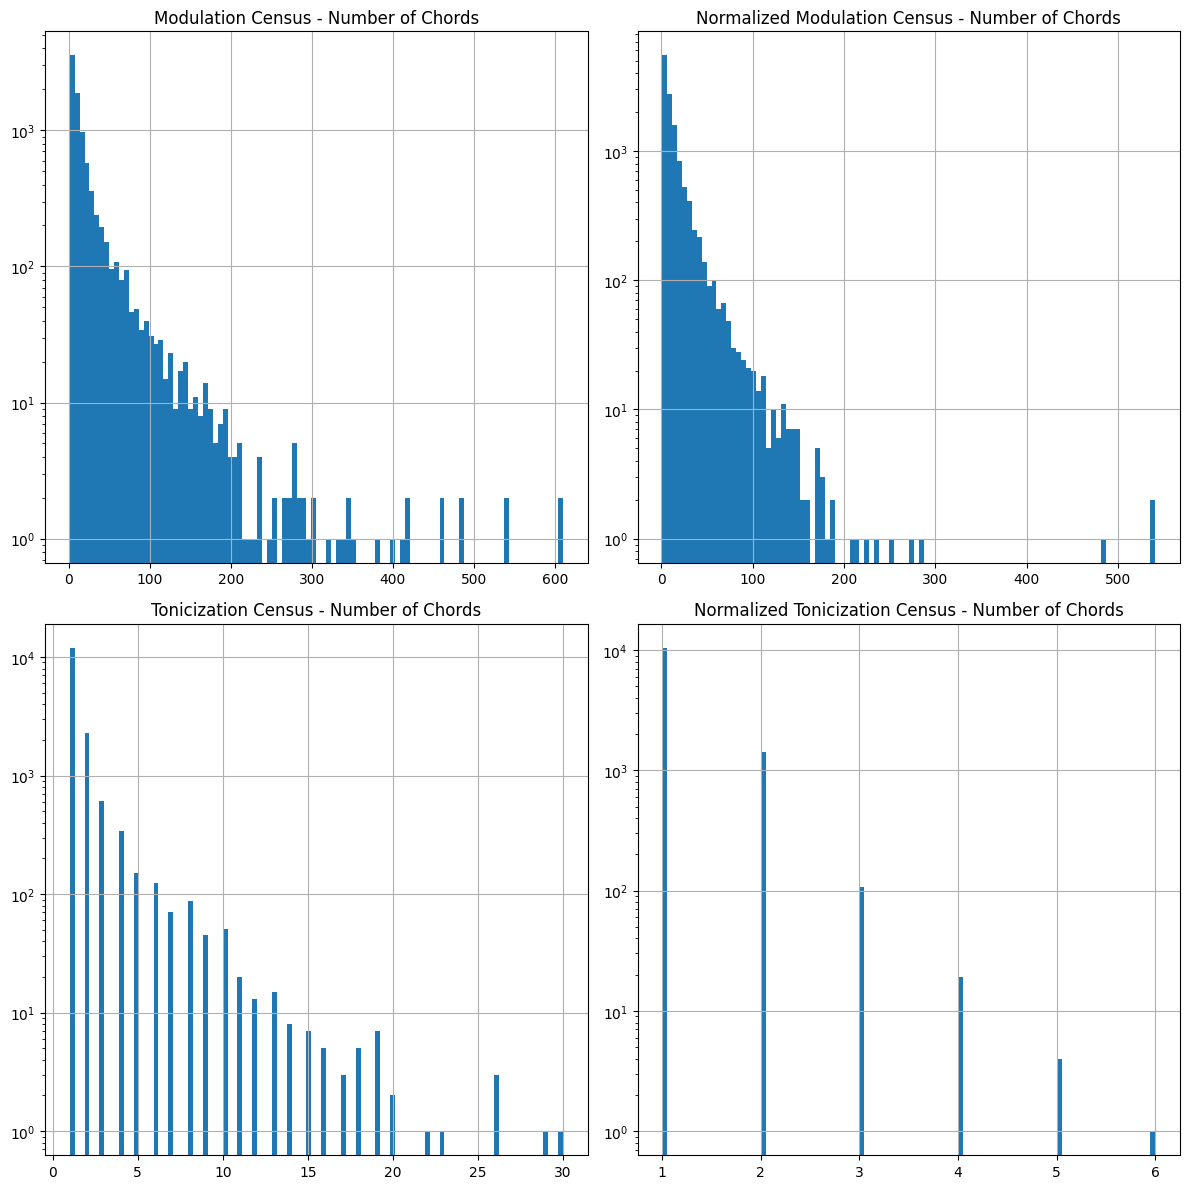

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()


def _plot(df, column, ax, title):
    df[column].hist(bins=100, ax=ax)
    ax.set_title(title)
    ax.set_yscale("log")


_plot(mod_census, "n_chords", axs[0], "Modulation Census - Number of Chords")
_plot(
    normalized_mod_census,
    "n_chords",
    axs[1],
    "Normalized Modulation Census - Number of Chords",
)
_plot(ton_census, "n_chords", axs[2], "Tonicization Census - Number of Chords")
_plot(
    normalized_ton_census,
    "n_chords",
    axs[3],
    "Normalized Tonicization Census - Number of Chords",
)
plt.tight_layout()

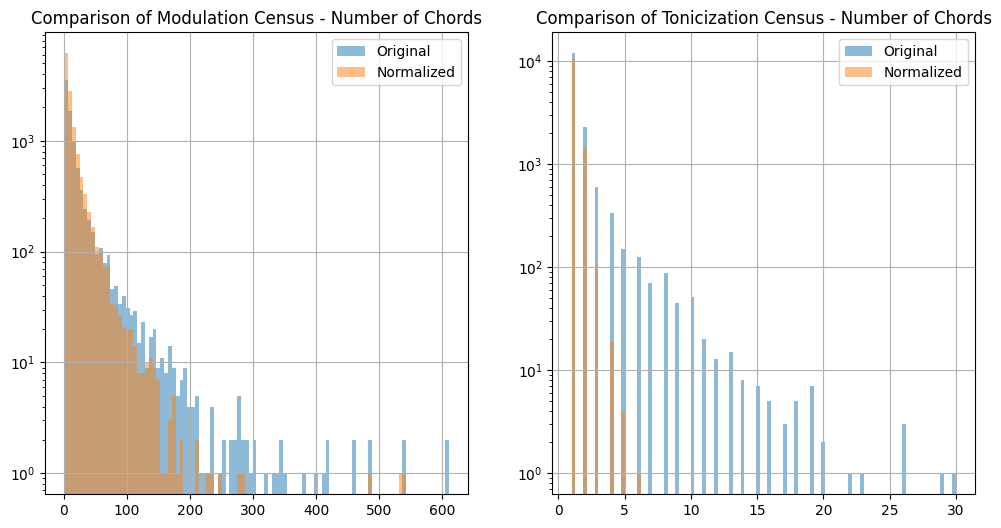

In [4]:
def _compare(
    df1,
    df2,
    column,
    ax,
    title,
    logy=True,
    logx=False,
    label1="Original",
    label2="Normalized",
    bins=100,
):
    if logy:
        ax.set_yscale("log")
    if logx:
        ax.set_xscale("log")

    counts, bin_edges = np.histogram(df1[column], bins=bins)

    df1[column].hist(bins=bin_edges, ax=ax, alpha=0.5, label=label1)
    df2[column].hist(bins=bin_edges, ax=ax, alpha=0.5, label=label2)

    ax.legend()
    ax.set_title(title)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs = axs.flatten()

_compare(
    mod_census,
    normalized_mod_census,
    "n_chords",
    axs[0],
    "Comparison of Modulation Census - Number of Chords",
)
_compare(
    ton_census,
    normalized_ton_census,
    "n_chords",
    axs[1],
    "Comparison of Tonicization Census - Number of Chords",
)

In [5]:
mod_census["duration"].isna().sum()


0

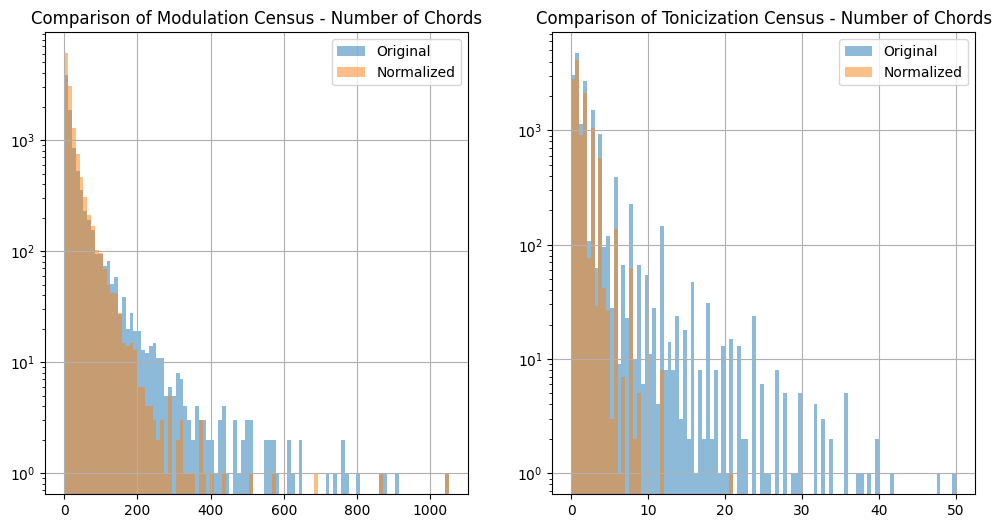

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs = axs.flatten()

_compare(
    mod_census,
    normalized_mod_census,
    "duration",
    axs[0],
    "Comparison of Modulation Census - Number of Chords",
)
_compare(
    ton_census,
    normalized_ton_census,
    "duration",
    axs[1],
    "Comparison of Tonicization Census - Number of Chords",
)

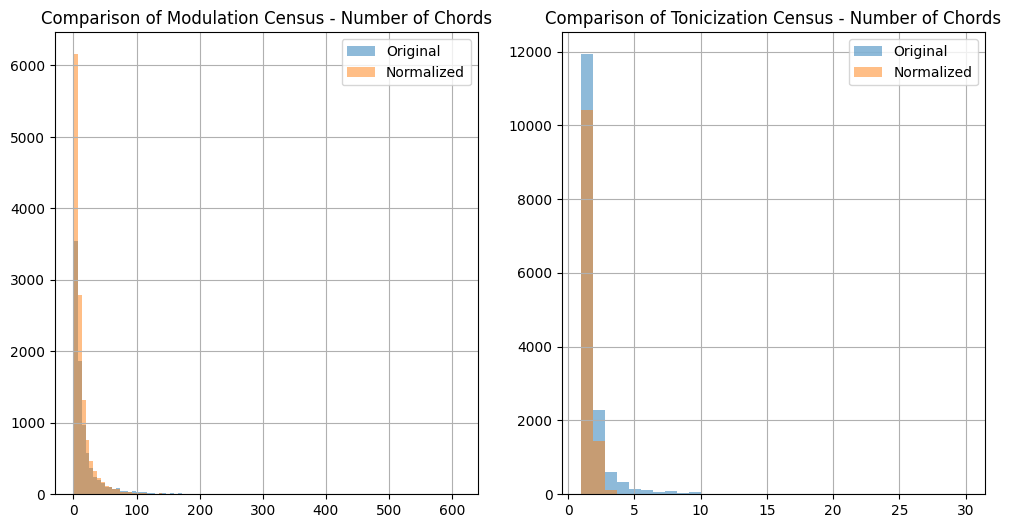

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs = axs.flatten()

_compare(
    mod_census,
    normalized_mod_census,
    "n_chords",
    axs[0],
    "Comparison of Modulation Census - Number of Chords",
    logy=False,
)
_compare(
    ton_census,
    normalized_ton_census,
    "n_chords",
    axs[1],
    "Comparison of Tonicization Census - Number of Chords",
    logy=False,
    bins=32,
)

In [9]:
assert mod_census["n_chords"].sum() == normalized_mod_census["n_chords"].sum()
assert mod_census["duration"].sum() == normalized_mod_census["duration"].sum()

totals = pd.DataFrame(
    {
        "n_chords": {
            "mod_census": mod_census["n_chords"].sum(),
            "normalized_mod_census": normalized_mod_census["n_chords"].sum(),
            "ton_census": ton_census["n_chords"].sum(),
            "normalized_ton_census": normalized_ton_census["n_chords"].sum(),
        },
        "duration": {
            "mod_census": mod_census["duration"].sum(),
            "normalized_mod_census": normalized_mod_census["duration"].sum(),
            "ton_census": ton_census["duration"].sum(),
            "normalized_ton_census": normalized_ton_census["duration"].sum(),
        },
    },
)
display(totals)


n_chord_summary = pd.DataFrame(
    {
        "mod_census": mod_census["n_chords"].describe(),
        "normalized_mod_census": normalized_mod_census["n_chords"].describe(),
        "ton_census": ton_census["n_chords"].describe(),
        "normalized_ton_census": normalized_ton_census["n_chords"].describe(),
    }
)
display(n_chord_summary)

duration_summary = pd.DataFrame(
    {
        "mod_census": mod_census["duration"].describe(),
        "normalized_mod_census": normalized_mod_census["duration"].describe(),
        "ton_census": ton_census["duration"].describe(),
        "normalized_ton_census": normalized_ton_census["duration"].describe(),
    }
)
display(duration_summary)

,n_chords,duration
mod_census,183876,284088.2500
normalized_mod_census,183876,284088.2500
ton_census,24643,37399.4375
normalized_ton_census,13711,18648.1875


,mod_census,normalized_mod_census,ton_census,normalized_ton_census
count,8759.000000,12828.000000,15778.000000,11983.000000
mean,20.992807,14.333957,1.561858,1.144204
std,36.328867,20.485693,1.618923,0.395773
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,1.000000,1.000000
50%,10.000000,8.000000,1.000000,1.000000
75%,21.000000,16.000000,1.000000,1.000000
max,610.000000,541.000000,30.000000,6.000000


,mod_census,normalized_mod_census,ton_census,normalized_ton_census
count,8759.000000,12828.000000,15778.000000,11983.000000
mean,32.433868,22.145950,2.370353,1.556220
std,61.012708,33.882025,3.255754,1.251694
min,0.500000,0.500000,0.062500,0.062500
25%,6.000000,6.000000,1.000000,1.000000
50%,12.500000,12.000000,1.500000,1.000000
75%,32.000000,24.000000,3.000000,2.000000
max,1050.000000,1050.000000,50.000000,21.000000


In [ ]:
n_chord_counts = pd.DataFrame(
    {
        "mod_census": mod_census["n_chords"].value_counts().sort_index(),
        "normalized_mod_census": normalized_mod_census["n_chords"]
        .value_counts()
        .sort_index(),
        "ton_census": ton_census["n_chords"].value_counts().sort_index(),
        "normalized_ton_census": normalized_ton_census["n_chords"]
        .value_counts()
        .sort_index(),
    }
)
display(n_chord_counts)

,mod_census,normalized_mod_census,ton_census,normalized_ton_census
n_chords,,,,
1,280.0,390.0,11926.0,10417.0
2,439.0,471.0,2287.0,1434.0
3,592.0,1377.0,606.0,108.0
4,699.0,1409.0,338.0,19.0
5,534.0,954.0,150.0,4.0
...,...,...,...,...
536,NaN,1.0,NaN,NaN
541,1.0,1.0,NaN,NaN
543,1.0,NaN,NaN,NaN


In [ ]:
# Generate log bins for duration

max_duration = mod_census["duration"].max()
log_bins = np.concatenate(
    [[0], np.logspace(np.log10(1), np.log10(max_duration), num=20, endpoint=True)]
)

duration_counts = pd.DataFrame(
    {
        "mod_census": pd.cut(mod_census["duration"], bins=log_bins)
        .value_counts()
        .sort_index(),
        "normalized_mod_census": pd.cut(
            normalized_mod_census["duration"], bins=log_bins
        )
        .value_counts()
        .sort_index(),
        "ton_census": pd.cut(ton_census["duration"], bins=log_bins)
        .value_counts()
        .sort_index(),
        "normalized_ton_census": pd.cut(
            normalized_ton_census["duration"], bins=log_bins
        )
        .value_counts()
        .sort_index(),
    }
)
display(duration_counts)

,mod_census,normalized_mod_census,ton_census,normalized_ton_census
duration,,,,
"(0.0, 1.0]",221,268,7746,6932
"(1.0, 1.442]",1,2,34,35
"(1.442, 2.08]",321,348,3801,2981
"(2.08, 2.999]",69,78,119,77
"(2.999, 4.326]",901,1323,2501,1664
"(4.326, 6.238]",920,1715,628,207
"(6.238, 8.996]",851,1407,336,73
"(8.996, 12.974]",1098,1907,324,13
"(12.974, 18.71]",980,1556,160,0


In [ ]:
duration_counts = pd.DataFrame(
    {
        "mod_census": mod_census["duration"].value_counts().sort_index(),
        "normalized_mod_census": normalized_mod_census["duration"]
        .value_counts()
        .sort_index(),
        "ton_census": ton_census["duration"].value_counts().sort_index(),
        "normalized_ton_census": normalized_ton_census["duration"]
        .value_counts()
        .sort_index(),
    }
)
display(duration_counts)

,mod_census,normalized_mod_census,ton_census,normalized_ton_census
duration,,,,
0.0625,NaN,NaN,1.0,1.0
0.1250,NaN,NaN,8.0,7.0
0.1875,NaN,NaN,3.0,3.0
0.2500,NaN,NaN,283.0,273.0
0.3125,NaN,NaN,17.0,18.0
...,...,...,...,...
802.5000,1.0,NaN,NaN,NaN
867.0000,1.0,1.0,NaN,NaN
873.0000,1.0,NaN,NaN,NaN
